#Import Libraries

##Neptune Ai

In [1]:
! pip install neptune-client==0.4.132


     |████████████████████████████████| 112kB 14.0MB/s 
     |████████████████████████████████| 829kB 29.3MB/s 
     |████████████████████████████████| 61kB 9.1MB/s 
     |████████████████████████████████| 163kB 44.9MB/s 
     |████████████████████████████████| 71kB 10.2MB/s 
     |████████████████████████████████| 133kB 50.3MB/s 
     |████████████████████████████████| 71kB 9.8MB/s 
  Created wheel for neptune-client: filename=neptune_client-0.4.132-py2.py3-none-any.whl size=166223 sha256=ae6f32138f21c5b19db136e07c7c593e0a9954d4fe9b397ea080d0a326b3156f
  Stored in directory: /root/.cache/pip/wheels/ef/17/bc/2f8eef68e5adb68415d3634a6c70185860f4461b00c1c6a37b
  Created wheel for future: filename=future-0.18.2-cp37-none-any.whl size=491058 sha256=4050a9665e85574ec0a7b0f2f5440df31513e1e9517c9ded922b706754a5a0a2
  Stored in directory: /root/.cache/pip/wheels/8b/99/a0/81daf51dcd359a9377b110a8a886b3895921802d2fc1b2397e
  Created wheel for strict-rfc3339: filename=strict_rfc3339-0.7-cp37-none

In [2]:
pip install  neptune-contrib neptune-client


     |████████████████████████████████| 71kB 7.9MB/s 
  Created wheel for neptune-contrib: filename=neptune_contrib-0.27.1-cp37-none-any.whl size=81334 sha256=9808a6e326c5d73a673bf2a6ddd44d914c2c0e9332bc236ad248699d0d4a98fc
  Stored in directory: /root/.cache/pip/wheels/81/79/bc/e5458e541cc4714c4fc233b1cd6deb076f310ca411f31062b4
Successfully built neptune-contrib


In [3]:
import neptune
from neptunecontrib.monitoring.keras import NeptuneMonitor
neptune.init(project_qualified_name='jathurshan0330/DataStorm2-round1', # change this to your `workspace_name/project_name`
             api_token='eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vdWkubmVwdHVuZS5haSIsImFwaV91cmwiOiJodHRwczovL3VpLm5lcHR1bmUuYWkiLCJhcGlfa2V5IjoiZmJkZjYxNGYtMTA0ZC00ZTc1LWJiMTYtNzczNjgwZWQ3OTUzIn0=', # change this to your api token
            )

Project(jathurshan0330/DataStorm2-round1)

##other necessary libraries

In [4]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.io
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from scipy import stats 
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Input,LSTM,Reshape,Conv2D,Flatten,Dropout,BatchNormalization, LeakyReLU, concatenate, GRU, GlobalMaxPooling1D, GlobalMaxPooling2D, Bidirectional

In [5]:
!pip install scikit-plot

#Read Data

##Mount Drive

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
cd '/content/drive/My Drive/Datastorm2.0'

/content/drive/My Drive/Datastorm2.0


In [15]:
!ls '/content/drive/My Drive/Datastorm2.0'

DataStorm2.0_Q1-v2.pdf
Hotel-A-data-dictionary.csv
Hotel-A-test.csv
Hotel-A-train.csv
Hotel-A-validation.csv
submission_KNN_upsampled_0.33_0.33_0.33.csv
submission_XGBoost_upsampled_0.33_0.33_0.33_hypertuned_0.3694.csv
submission_XGBoost_upsampled_0.33_0.33_0.33_hypertuned_03694.csv
submission_XGBoost_upsampled_0.33_0.33_0.33_selected_feature_16.csv
train_data_upsamp_2.csv
train_data_upsamp_3.csv
train_data_upsamp_4.csv
train_data_upsamp_5.csv
train_data_upsamp.csv
train_labels_upsamp_2.csv
train_labels_upsamp_3.csv
train_labels_upsamp_4.csv
train_labels_upsamp_5.csv
train_labels_upsamp.csv


##Data

In [16]:
train_data = pd.read_csv('Hotel-A-train.csv')
print(train_data.head()) 
print(train_data.shape)
val_data = pd.read_csv('Hotel-A-validation.csv')
print(val_data.head()) 
print(val_data.shape)
test_data = pd.read_csv('Hotel-A-test.csv')
print(test_data.head())
print(test_data.shape) 



   Reservation-id Gender  Age  ... Use_Promotion Discount_Rate Room_Rate
0        39428300      F   40  ...           Yes            10       218
1        77491756      F   49  ...            No             0       185
2        73747291      F   42  ...            No             0       119
3        67301739      M   25  ...           Yes             5       144
4        77222321      F   62  ...           Yes            10       242

[5 rows x 24 columns]
(27499, 24)
   Reservation-id Gender  Age  ... Use_Promotion Discount_Rate Room_Rate
0        45716350      M   56  ...           Yes            15       192
1        88857401      M   60  ...            No             0       187
2        16074440      F   58  ...           Yes            10       227
3        10992124      F   23  ...           Yes            25       189
4        15934351      F   47  ...           Yes            10       218

[5 rows x 24 columns]
(2749, 24)
   Reservation-id Gender  Age  ... Use_Promotion Discou

In [17]:
print(train_data.isna().sum())
print(val_data.isna().sum())
print(test_data.isna().sum())

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64
Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults 

In [18]:
train_labels = train_data.pop("Reservation_Status")
print(train_labels.head())

for i in range (len(train_labels)):
  if train_labels[i] == 'Check-In':
    train_labels[i] = 1
  if train_labels[i] == 'Canceled':
    train_labels[i] = 2
  if train_labels[i] == 'No-Show':
    train_labels[i] = 3

print(train_labels.head()) 

val_labels = val_data.pop("Reservation_Status")
print(val_labels.head())

for i in range (len(val_labels)):
  if val_labels[i] == 'Check-In':
    val_labels[i] = 1
   
  if val_labels[i] == 'Canceled':
    val_labels[i] = 2
  if val_labels[i] == 'No-Show':
    val_labels[i] = 3

print(val_labels.head()) 

0    Check-In
1    Check-In
2    Check-In
3    Check-In
4    Check-In
Name: Reservation_Status, dtype: object
0    1
1    1
2    1
3    1
4    1
Name: Reservation_Status, dtype: object
0     No-Show
1    Canceled
2    Canceled
3    Check-In
4    Check-In
Name: Reservation_Status, dtype: object
0    3
1    2
2    2
3    1
4    1
Name: Reservation_Status, dtype: object


In [19]:
print("No of Check-In in training data : " +str((train_labels == 1).sum()))
print("No of Canceled in training data : " +str((train_labels == 2).sum()))
print("No of No-Show in training data : " +str((train_labels == 3).sum()))
tot=(train_labels == 1).sum()+(train_labels == 2).sum()+(train_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in training data = " +str((train_labels == 1).sum()/tot)+' : '+str((train_labels == 2).sum()/tot)+' : '+str((train_labels == 3).sum()/tot))


print("No of Check-In in validation data : " +str((val_labels == 1).sum()))
print("No of Canceled in validation data : " +str((val_labels == 2).sum()))
print("No of No-Show in validation data : " +str((val_labels == 3).sum()))
tot=(val_labels == 1).sum()+(val_labels == 2).sum()+(val_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in Validation data = " +str((val_labels == 1).sum()/tot)+' : '+str((val_labels == 2).sum()/tot)+' : '+str((val_labels == 3).sum()/tot))


No of Check-In in training data : 21240
No of Canceled in training data : 4134
No of No-Show in training data : 2125
Ratio of Check-In : Canceled : No-Show  in training data = 0.772391723335394 : 0.15033273937234082 : 0.07727553729226518
No of Check-In in validation data : 1610
No of Canceled in validation data : 741
No of No-Show in validation data : 398
Ratio of Check-In : Canceled : No-Show  in Validation data = 0.5856675154601674 : 0.26955256456893417 : 0.1447799199708985


#Data Preprocessing

##Extracting features from Check in and reservation date

In [20]:
from datetime import datetime
def days(start_date, end_date):
  start_date = datetime.strptime(start_date, "%m/%d/%Y")
  end_date = datetime.strptime(end_date, "%m/%d/%Y")
  #print((end_date - start_date).days)
  return (end_date - start_date).days

def weekday(date):
  year = datetime.strptime(str(date), '%m/%d/%Y').year
  month = datetime.strptime(str(date), '%m/%d/%Y').month
  day = datetime.strptime(str(date), '%m/%d/%Y').day
  #print(year,month,day)
  x = datetime(year,month,day)
  week_no = x.strftime("%w")   #0 = Sunday, 1 = Monday, 2 = Tuesday, 3 = Wednesday, 4 = Thurday, 5 = Friday, 6 = Saturday
  return int(week_no)
  
def weekend(start_date, end_date):
  weeklist = [0,1,2,3,4,5,6,0,1,2,3,4,5,6]
  start = weekday(start_date)
  end = weekday(end_date)
  duration = days(start_date, end_date)
  if duration >= 7:
    return 1
  else:
    stayed = weeklist[start : start + duration]
    #print("start day :", start, "; end day :", end)
    #print(start,duration,stayed)
    if (0 or 1) in stayed:
      return 1
    else:
      return 0


In [21]:
#for training data
week_end_train = []
stay_duration = []
reserve_duration = []
a = 0
temp_a = []
b = 0
temp_b = []
for i in range(len(train_labels)):
  checkin = train_data["Expected_checkin"][i]
  checkout = train_data["Expected_checkout"][i]
  reserve = train_data["Booking_date"][i]
  if days(reserve,checkin ) == 0 and train_labels[i] != 1:
    a+=1
    temp_a.append(i)
  if days(reserve,checkout ) < 0 and train_labels[i] != 1:
    b+=1
    temp_b.append(i)
  stay_duration.append(days(checkin,checkout))
  reserve_duration.append(days(reserve,checkout ))
  week_end_train.append(weekend(checkin, checkout))

stay_duration = pd.DataFrame(stay_duration, columns=['stay_duration'])
reserve_duration = pd.DataFrame(reserve_duration, columns=['reserve_duration'])
week_end_train = pd.DataFrame(week_end_train, columns=['week_end'])
print(temp_a)
print(temp_b)
#print(train_data["Expected_checkin"][6])
#print(train_data["Booking_date"][6])
print(a)
print(b)
print(stay_duration.head())
print(stay_duration.shape)
print(week_end_train.head())
print(week_end_train.shape)
print(reserve_duration.head())
print(reserve_duration.shape)

[13037, 13670, 13914, 14353, 14413, 14917, 17124, 17370, 17409, 18272, 18855, 20622, 21445, 21558, 22491, 23216, 23739, 24359, 24505, 24988, 25506, 26021, 27049, 27285]
[]
24
0
   stay_duration
0              1
1              1
2              4
3              1
4              1
(27499, 1)
   week_end
0         0
1         0
2         0
3         0
4         0
(27499, 1)
   reserve_duration
0                42
1                37
2                 7
3                13
4                14
(27499, 1)


In [22]:
#for validation data
week_end_val = []
stay_duration_val = []
reserve_duration_val = []
a = 0
temp_a = []
b = 0
temp_b = []
for i in range(len(val_labels)):
  checkin = val_data["Expected_checkin"][i]
  checkout = val_data["Expected_checkout"][i]
  reserve = val_data["Booking_date"][i]
  if days(reserve,checkin ) == 0 and val_labels[i] != 1:
    a+=1
    temp_a.append(i)
  if days(reserve,checkin ) < 0 and val_labels[i] != 1:
    b+=1
    temp_b.append(i)
  stay_duration_val.append(days(checkin,checkout))
  reserve_duration_val.append(days(reserve,checkout ))
  week_end_val.append(weekend(checkin, checkout))

stay_duration_val = pd.DataFrame(stay_duration_val, columns=['stay_duration'])
reserve_duration_val = pd.DataFrame(reserve_duration_val, columns=['reserve_duration'])
week_end_val = pd.DataFrame(week_end_val, columns=['week_end'])
print(temp_a)
print(temp_b)
#print(train_data["Expected_checkin"][6])
#print(train_data["Booking_date"][6])
print(a)
print(b)
print(stay_duration_val.head())
print(stay_duration_val.shape)
print(week_end_val.head())
print(week_end_val.shape)
print(reserve_duration_val.head())
print(reserve_duration_val.shape)

[286, 1862, 1924, 1928]
[200, 256, 780, 1066, 1338, 1384, 1789, 2324]
4
8
   stay_duration
0              2
1              4
2              1
3              2
4              1
(2749, 1)
   week_end
0         0
1         0
2         0
3         0
4         0
(2749, 1)
   reserve_duration
0               197
1               179
2               194
3               105
4                93
(2749, 1)


In [23]:
#for test data
week_end_test = []
stay_duration_test = []
reserve_duration_test = []
a = 0
temp_a = []
b = 0
temp_b = []
for i in range(len(test_data["Expected_checkin"])):
  checkin = test_data["Expected_checkin"][i]
  checkout = test_data["Expected_checkout"][i]
  reserve = test_data["Booking_date"][i]
  if days(reserve,checkin ) == 0:
    a+=1
    temp_a.append(i)
  if days(reserve,checkin ) < 0 :
    b+=1
    temp_b.append(i)
  stay_duration_test.append(days(checkin,checkout))
  reserve_duration_test.append(days(reserve,checkout ))
  week_end_test.append(weekend(checkin, checkout))

stay_duration_test = pd.DataFrame(stay_duration_test, columns=['stay_duration'])
reserve_duration_test = pd.DataFrame(reserve_duration_test, columns=['reserve_duration'])
week_end_test = pd.DataFrame(week_end_test, columns=['week_end'])
print(temp_a)
print(temp_b)
#print(train_data["Expected_checkin"][6])
#print(train_data["Booking_date"][6])
print(a)
print(b)
print(stay_duration_test.head())
print(stay_duration_test.shape)
print(week_end_test.head())
print(week_end_test.shape)
print(reserve_duration_test.head())
print(reserve_duration_test.shape)

[134, 449, 470, 604, 690, 767, 982, 1157, 1557, 1824, 2490, 2601, 2709, 2813, 2973, 3041, 3300, 3923, 3978, 4209, 4248, 4317]
[72, 439, 465, 487, 632, 803, 915, 918, 1070, 1406, 1469, 1521, 1580, 1797, 1891, 1900, 1914, 2082, 2176, 2313, 2789, 3063, 3375, 3444, 3476, 3478, 3535]
22
27
   stay_duration
0              1
1              1
2              3
3              2
4              2
(4318, 1)
   week_end
0         0
1         0
2         0
3         0
4         0
(4318, 1)
   reserve_duration
0                22
1               105
2                23
3               184
4                20
(4318, 1)


In [24]:
#concat features

train_data=pd.concat([train_data,week_end_train],axis=1)
train_data=pd.concat([train_data,stay_duration],axis=1)
train_data=pd.concat([train_data,reserve_duration],axis=1)

val_data=pd.concat([val_data,week_end_val],axis=1)
val_data=pd.concat([val_data,stay_duration_val],axis=1)
val_data=pd.concat([val_data,reserve_duration_val],axis=1)

test_data=pd.concat([test_data,week_end_test],axis=1)
test_data=pd.concat([test_data,stay_duration_test],axis=1)
test_data=pd.concat([test_data,reserve_duration_test],axis=1)

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(27499, 26)
(2749, 26)
(4318, 26)


##Imbalanced Data Handling

###READ previously saved data

In [25]:
train_data = pd.read_csv('train_data_upsamp_3.csv')          # 3 is best
print(train_data.head()) 
print(train_data.shape)
train_labels = pd.read_csv('train_labels_upsamp_3.csv')
print(train_labels.head()) 
print(train_labels.shape)



   Reservation-id Gender  Age  ... week_end stay_duration reserve_duration
0        39428300      F   40  ...        0             1               42
1        77491756      F   49  ...        0             1               37
2        73747291      F   42  ...        0             4                7
3        67301739      M   25  ...        0             1               13
4        77222321      F   62  ...        0             1               14

[5 rows x 26 columns]
(61035, 26)
   0
0  1
1  1
2  1
3  1
4  1
(61035, 1)


###Upsampling

In [ ]:
#Up Sampling   data.iloc [[3, 4], [1, 2]]
temp = train_labels.copy()
for i in range(len(temp)):
  if i%(len(temp)//10)==0:
    print('.',end='')
  if temp[i]==2:
    x = train_data.iloc[i,:]
    x1 = pd.Series(data={'Reservation_Status':2})
  
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
     

    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    

  if temp[i]==3:
    x=train_data.iloc[i,:]
    x1 = pd.Series(data={'Reservation_Status':3})
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True) 
    train_data = train_data.append(x, ignore_index = True)
    
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    train_labels = train_labels.append(x1, ignore_index = True)
    #break

print(train_data.shape)
print(x)
print(train_data.iloc[-1,:])
print(train_labels.shape)
print(train_labels.iloc[-1])
print(x1)

In [ ]:
#Save upsampled data
train_data.to_csv('train_data_upsamp_5.csv',index=False)
train_labels.to_csv('train_labels_upsamp_5.csv',index=False)

In [ ]:
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.under_sampling import EditedNearestNeighbours
sm = EditedNearestNeighbours()
train_columns = train_data.columns
#sm = SMOTE() 
train_data, train_label = sm.fit_resample(train_data,train_label)
train_data = pd.DataFrame(train_data, columns = train_columns) 

/usr/local/lib/python3.7/dist-packages/imblearn/utils/_validation.py:93: UserWarning: 'y' should be of types ('binary', 'multiclass', 'multilabel-indicator') only. Got unknown instead.
  TARGET_KIND, type_of_target(y)))
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


###Checking Ratios


In [26]:
print("No of Check-In in training data : " +str((train_labels == 1).sum()))
print("No of Canceled in training data : " +str((train_labels == 2).sum()))
print("No of No-Show in training data : " +str((train_labels == 3).sum()))
tot=(train_labels == 1).sum()+(train_labels == 2).sum()+(train_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in training data = " +str((train_labels == 1).sum()/tot)+' : '+str((train_labels == 2).sum()/tot)+' : '+str((train_labels == 3).sum()/tot))


print("No of Check-In in validation data : " +str((val_labels == 1).sum()))
print("No of Canceled in validation data : " +str((val_labels == 2).sum()))
print("No of No-Show in validation data : " +str((val_labels == 3).sum()))
tot=(val_labels == 1).sum()+(val_labels == 2).sum()+(val_labels == 3).sum()
print("Ratio of Check-In : Canceled : No-Show  in Validation data = " +str((val_labels == 1).sum()/tot)+' : '+str((val_labels == 2).sum()/tot)+' : '+str((val_labels == 3).sum()/tot))


No of Check-In in training data : 0    21240
dtype: int64
No of Canceled in training data : 0    20670
dtype: int64
No of No-Show in training data : 0    19125
dtype: int64
Ratio of Check-In : Canceled : No-Show  in training data = 0    0.347997
dtype: float64 : 0    0.338658
dtype: float64 : 0    0.313345
dtype: float64
No of Check-In in validation data : 1610
No of Canceled in validation data : 741
No of No-Show in validation data : 398
Ratio of Check-In : Canceled : No-Show  in Validation data = 0.5856675154601674 : 0.26955256456893417 : 0.1447799199708985


## Encoding Categorical data

In [27]:
print(train_data.columns)
print(len(train_data.columns))

print(val_data.columns)
print(len(val_data.columns))

print(test_data.columns)
print(len(test_data.columns))

Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'week_end',
       'stay_duration', 'reserve_duration'],
      dtype='object')
26
Index(['Reservation-id', 'Gender', 'Age', 'Ethnicity', 'Educational_Level',
       'Income', 'Country_region', 'Hotel_Type', 'Expected_checkin',
       'Expected_checkout', 'Booking_date', 'Adults', 'Children', 'Babies',
       'Meal_Type', 'Visted_Previously', 'Previous_Cancellations',
       'Deposit_type', 'Booking_channel', 'Required_Car_Parking',
       'Use_Promotion', 'Discount_Rate', 'Room_Rate', 'week_end',
       'stay_duration', 'reserve_duration'],
      dtype='object')
26
Index(['Reservation-

In [28]:
#train data
gender_dummies=pd.get_dummies(train_data['Gender'],drop_first=True, prefix='Gen')
gender=train_data.pop('Gender')
train_data=pd.concat([train_data,gender_dummies],axis=1)

eth_dummies=pd.get_dummies(train_data['Ethnicity'],drop_first=False, prefix='Eth')
eth=train_data.pop('Ethnicity')
train_data=pd.concat([train_data,eth_dummies],axis=1)

edu_dummies=pd.get_dummies(train_data['Educational_Level'],drop_first=False, prefix='Edu')
edu=train_data.pop('Educational_Level')
train_data=pd.concat([train_data,edu_dummies],axis=1)

in_dummies=pd.get_dummies(train_data['Income'],drop_first=False, prefix='In')
in_dummies=in_dummies.rename(columns={'In_25K --50K': 'In_25K_50K', 'In_50K -- 100K': 'In_50K_100K', 'In_<25K':'In_below25K', 'In_>100K':'In_above100K' })
income=train_data.pop('Income')
train_data=pd.concat([train_data,in_dummies],axis=1)

region_dummies=pd.get_dummies(train_data['Country_region'],drop_first=False, prefix='Coun')
region=train_data.pop('Country_region')
train_data=pd.concat([train_data,region_dummies],axis=1)

hotel_dummies=pd.get_dummies(train_data['Hotel_Type'],drop_first=False, prefix='Hotel')
hotel=train_data.pop('Hotel_Type')
train_data=pd.concat([train_data,hotel_dummies],axis=1)

meal_dummies=pd.get_dummies(train_data['Meal_Type'],drop_first=False, prefix='Meal')
meal=train_data.pop('Meal_Type')
train_data=pd.concat([train_data,meal_dummies],axis=1)

visit_prev_dummies=pd.get_dummies(train_data['Visted_Previously'],drop_first=True, prefix='Visit')
visit_prev=train_data.pop('Visted_Previously')
train_data=pd.concat([train_data,visit_prev_dummies],axis=1)

prev_can_dummies=pd.get_dummies(train_data['Previous_Cancellations'],drop_first=True, prefix='Prev_can')
prev_can=train_data.pop('Previous_Cancellations')
train_data=pd.concat([train_data,prev_can_dummies],axis=1)

dep_dummies=pd.get_dummies(train_data['Deposit_type'],drop_first=False, prefix='Dep')
dep=train_data.pop('Deposit_type')
train_data=pd.concat([train_data,dep_dummies],axis=1)

book_dummies=pd.get_dummies(train_data['Booking_channel'],drop_first=False, prefix='Book')
book=train_data.pop('Booking_channel')
train_data=pd.concat([train_data,book_dummies],axis=1)

car_dummies=pd.get_dummies(train_data['Required_Car_Parking'],drop_first=True, prefix='Car')
car=train_data.pop('Required_Car_Parking')
train_data=pd.concat([train_data,car_dummies],axis=1)

promo_dummies=pd.get_dummies(train_data['Use_Promotion'],drop_first=True, prefix='Promo')
promo=train_data.pop('Use_Promotion')
train_data=pd.concat([train_data,promo_dummies],axis=1)



print(train_data.columns)
print(train_data.head())

Index(['Reservation-id', 'Age', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Discount_Rate',
       'Room_Rate', 'week_end', 'stay_duration', 'reserve_duration', 'Gen_M',
       'Eth_African American', 'Eth_Asian American', 'Eth_Latino',
       'Eth_caucasian', 'Edu_College', 'Edu_Grad', 'Edu_High-School',
       'Edu_Mid-School', 'In_25K_50K', 'In_50K_100K', 'In_below25K',
       'In_above100K', 'Coun_East', 'Coun_North', 'Coun_South', 'Coun_West',
       'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Visit_Yes', 'Prev_can_Yes', 'Dep_No Deposit',
       'Dep_Non-Refundable', 'Dep_Refundable', 'Book_Agent', 'Book_Direct',
       'Book_Online', 'Car_Yes', 'Promo_Yes'],
      dtype='object')
   Reservation-id  Age Expected_checkin  ... Book_Online Car_Yes  Promo_Yes
0        39428300   40         7/1/2015  ...           1       1          1
1        77491756   49         7/1/2015  ..

In [29]:
#Val data
gender_dummies=pd.get_dummies(val_data['Gender'],drop_first=True, prefix='Gen')
gender=val_data.pop('Gender')
val_data=pd.concat([val_data,gender_dummies],axis=1)

eth_dummies=pd.get_dummies(val_data['Ethnicity'],drop_first=False, prefix='Eth')
eth=val_data.pop('Ethnicity')
val_data=pd.concat([val_data,eth_dummies],axis=1)

edu_dummies=pd.get_dummies(val_data['Educational_Level'],drop_first=False, prefix='Edu')
edu=val_data.pop('Educational_Level')
val_data=pd.concat([val_data,edu_dummies],axis=1)

in_dummies=pd.get_dummies(val_data['Income'],drop_first=False, prefix='In')
in_dummies=in_dummies.rename(columns={'In_25K --50K': 'In_25K_50K', 'In_50K -- 100K': 'In_50K_100K', 'In_<25K':'In_below25K', 'In_>100K':'In_above100K' })
income=val_data.pop('Income')
val_data=pd.concat([val_data,in_dummies],axis=1)

region_dummies=pd.get_dummies(val_data['Country_region'],drop_first=False, prefix='Coun')
region=val_data.pop('Country_region')
val_data=pd.concat([val_data,region_dummies],axis=1)

hotel_dummies=pd.get_dummies(val_data['Hotel_Type'],drop_first=False, prefix='Hotel')
hotel=val_data.pop('Hotel_Type')
val_data=pd.concat([val_data,hotel_dummies],axis=1)

meal_dummies=pd.get_dummies(val_data['Meal_Type'],drop_first=False, prefix='Meal')
meal=val_data.pop('Meal_Type')
val_data=pd.concat([val_data,meal_dummies],axis=1)

visit_prev_dummies=pd.get_dummies(val_data['Visted_Previously'],drop_first=True, prefix='Visit')
visit_prev=val_data.pop('Visted_Previously')
val_data=pd.concat([val_data,visit_prev_dummies],axis=1)

prev_can_dummies=pd.get_dummies(val_data['Previous_Cancellations'],drop_first=True, prefix='Prev_can')
prev_can=val_data.pop('Previous_Cancellations')
val_data=pd.concat([val_data,prev_can_dummies],axis=1)

dep_dummies=pd.get_dummies(val_data['Deposit_type'],drop_first=False, prefix='Dep')
dep=val_data.pop('Deposit_type')
val_data=pd.concat([val_data,dep_dummies],axis=1)

book_dummies=pd.get_dummies(val_data['Booking_channel'],drop_first=False, prefix='Book')
book=val_data.pop('Booking_channel')
val_data=pd.concat([val_data,book_dummies],axis=1)

car_dummies=pd.get_dummies(val_data['Required_Car_Parking'],drop_first=True, prefix='Car')
car=val_data.pop('Required_Car_Parking')
val_data=pd.concat([val_data,car_dummies],axis=1)

promo_dummies=pd.get_dummies(val_data['Use_Promotion'],drop_first=True, prefix='Promo')
promo=val_data.pop('Use_Promotion')
val_data=pd.concat([val_data,promo_dummies],axis=1)



print(val_data.columns)
print(val_data.head())

Index(['Reservation-id', 'Age', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Discount_Rate',
       'Room_Rate', 'week_end', 'stay_duration', 'reserve_duration', 'Gen_M',
       'Eth_African American', 'Eth_Asian American', 'Eth_Latino',
       'Eth_caucasian', 'Edu_College', 'Edu_Grad', 'Edu_High-School',
       'Edu_Mid-School', 'In_25K_50K', 'In_50K_100K', 'In_below25K',
       'In_above100K', 'Coun_East', 'Coun_North', 'Coun_South', 'Coun_West',
       'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Visit_Yes', 'Prev_can_Yes', 'Dep_No Deposit',
       'Dep_Non-Refundable', 'Dep_Refundable', 'Book_Agent', 'Book_Direct',
       'Book_Online', 'Car_Yes', 'Promo_Yes'],
      dtype='object')
   Reservation-id  Age Expected_checkin  ... Book_Online Car_Yes  Promo_Yes
0        45716350   56        8/31/2016  ...           0       0          1
1        88857401   60        8/31/2016  ..

In [30]:
#test data
gender_dummies=pd.get_dummies(test_data['Gender'],drop_first=True, prefix='Gen')
gender=test_data.pop('Gender')
test_data=pd.concat([test_data,gender_dummies],axis=1)

eth_dummies=pd.get_dummies(test_data['Ethnicity'],drop_first=False, prefix='Eth')
eth=test_data.pop('Ethnicity')
test_data=pd.concat([test_data,eth_dummies],axis=1)

edu_dummies=pd.get_dummies(test_data['Educational_Level'],drop_first=False, prefix='Edu')
edu=test_data.pop('Educational_Level')
test_data=pd.concat([test_data,edu_dummies],axis=1)

in_dummies=pd.get_dummies(test_data['Income'],drop_first=False, prefix='In')
in_dummies=in_dummies.rename(columns={'In_25K --50K': 'In_25K_50K', 'In_50K -- 100K': 'In_50K_100K', 'In_<25K':'In_below25K', 'In_>100K':'In_above100K' })
income=test_data.pop('Income')
test_data=pd.concat([test_data,in_dummies],axis=1)

region_dummies=pd.get_dummies(test_data['Country_region'],drop_first=False, prefix='Coun')
region=test_data.pop('Country_region')
test_data=pd.concat([test_data,region_dummies],axis=1)

hotel_dummies=pd.get_dummies(test_data['Hotel_Type'],drop_first=False, prefix='Hotel')
hotel=test_data.pop('Hotel_Type')
test_data=pd.concat([test_data,hotel_dummies],axis=1)

meal_dummies=pd.get_dummies(test_data['Meal_Type'],drop_first=False, prefix='Meal')
meal=test_data.pop('Meal_Type')
test_data=pd.concat([test_data,meal_dummies],axis=1)

visit_prev_dummies=pd.get_dummies(test_data['Visted_Previously'],drop_first=True, prefix='Visit')
visit_prev=test_data.pop('Visted_Previously')
test_data=pd.concat([test_data,visit_prev_dummies],axis=1)

prev_can_dummies=pd.get_dummies(test_data['Previous_Cancellations'],drop_first=True, prefix='Prev_can')
prev_can=test_data.pop('Previous_Cancellations')
test_data=pd.concat([test_data,prev_can_dummies],axis=1)

dep_dummies=pd.get_dummies(test_data['Deposit_type'],drop_first=False, prefix='Dep')
dep=test_data.pop('Deposit_type')
test_data=pd.concat([test_data,dep_dummies],axis=1)

book_dummies=pd.get_dummies(test_data['Booking_channel'],drop_first=False, prefix='Book')
book=test_data.pop('Booking_channel')
test_data=pd.concat([test_data,book_dummies],axis=1)

car_dummies=pd.get_dummies(test_data['Required_Car_Parking'],drop_first=True, prefix='Car')
car=test_data.pop('Required_Car_Parking')
test_data=pd.concat([test_data,car_dummies],axis=1)

promo_dummies=pd.get_dummies(test_data['Use_Promotion'],drop_first=True, prefix='Promo')
promo=test_data.pop('Use_Promotion')
test_data=pd.concat([test_data,promo_dummies],axis=1)



print(test_data.columns)
print(test_data.head())

Index(['Reservation-id', 'Age', 'Expected_checkin', 'Expected_checkout',
       'Booking_date', 'Adults', 'Children', 'Babies', 'Discount_Rate',
       'Room_Rate', 'week_end', 'stay_duration', 'reserve_duration', 'Gen_M',
       'Eth_African American', 'Eth_Asian American', 'Eth_Latino',
       'Eth_caucasian', 'Edu_College', 'Edu_Grad', 'Edu_High-School',
       'Edu_Mid-School', 'In_25K_50K', 'In_50K_100K', 'In_below25K',
       'In_above100K', 'Coun_East', 'Coun_North', 'Coun_South', 'Coun_West',
       'Hotel_Airport Hotels', 'Hotel_City Hotel', 'Hotel_Resort', 'Meal_BB',
       'Meal_FB', 'Meal_HB', 'Visit_Yes', 'Prev_can_Yes', 'Dep_No Deposit',
       'Dep_Non-Refundable', 'Dep_Refundable', 'Book_Agent', 'Book_Direct',
       'Book_Online', 'Car_Yes', 'Promo_Yes'],
      dtype='object')
   Reservation-id  Age Expected_checkin  ... Book_Online Car_Yes  Promo_Yes
0        62931593   52       11/18/2016  ...           0       1          1
1        70586099   47       11/18/2016  ..

In [31]:
for i in train_data.columns:
  if i not in test_data.columns:
    print(i)

##Label Encoding


In [32]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_labels)
print(le.classes_)
train_label=le.transform(train_labels)

le = preprocessing.LabelEncoder()
le.fit(val_labels)
print(le.classes_)
val_label=le.transform(val_labels)

[1 2 3]
[1 2 3]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##Remove unnecessary columns

In [33]:
train_data.pop('Reservation-id')
val_data.pop('Reservation-id')
test_reservation=test_data['Reservation-id']
test_data.pop('Reservation-id')

train_data.pop('Expected_checkin')
val_data.pop('Expected_checkin')
test_data.pop('Expected_checkin')

train_data.pop('Expected_checkout')
val_data.pop('Expected_checkout')
test_data.pop('Expected_checkout')

train_data.pop('Booking_date')
val_data.pop('Booking_date')
test_data.pop('Booking_date')

0       10/28/2016
1         8/6/2016
2         4/8/2017
3        5/20/2016
4       10/31/2016
           ...    
4313     9/11/2016
4314     2/10/2017
4315     8/26/2016
4316      3/4/2017
4317     3/29/2017
Name: Booking_date, Length: 4318, dtype: object

#Neptune Create Experiment

In [ ]:
neptune.create_experiment(name = 'Experiment without dates data and testing on multiple models - upsampled to 0.333 ratio - All features with new 3 features')

https://ui.neptune.ai/jathurshan0330/DataStorm2-round1/e/DAT-9


Experiment(DAT-9)

#Model Building

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, classification_report, plot_confusion_matrix, precision_score, recall_score
from sklearn import tree, svm
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors,KNeighborsClassifier

In [35]:
#train_data=train_data[['Age','Adults','Discount_Rate','Room_Rate','week_end','stay_duration','reserve_duration','Eth_African American','Eth_caucasian','Coun_East','Hotel_Airport Hotels','Meal_BB','Meal_FB','Visit_Yes','Prev_can_Yes','Dep_No Deposit']]
#val_data=val_data[['Age','Adults','Discount_Rate','Room_Rate','week_end','stay_duration','reserve_duration','Eth_African American','Eth_caucasian','Coun_East','Hotel_Airport Hotels','Meal_BB','Meal_FB','Visit_Yes','Prev_can_Yes','Dep_No Deposit']]
#test_data=test_data[['Age','Adults','Discount_Rate','Room_Rate','week_end','stay_duration','reserve_duration','Eth_African American','Eth_caucasian','Coun_East','Hotel_Airport Hotels','Meal_BB','Meal_FB','Visit_Yes','Prev_can_Yes','Dep_No Deposit']]

#train_data = train_data[selected_features]
#val_data = val_data[selected_features]
#test_data = test_data[selected_features]

print(train_data.shape)
print(val_data.shape)
print(test_data.shape)

(61035, 42)
(2749, 42)
(4318, 42)


##logistic regression approach

In [37]:
model= LogisticRegression(multi_class='multinomial', solver='saga',max_iter=100) 
model.fit(train_data,train_label) 
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.42514950438273125
Validation accuracy : 0.3619497999272463
Precision : 0.34582289608245365
Recall : 0.34190133378408855
F1-Score : 0.3229425236069032
Classification Report
              precision    recall  f1-score   support

           0       0.62      0.36      0.46      1610
           1       0.28      0.44      0.34       741
           2       0.14      0.23      0.17       398

    accuracy                           0.36      2749
   macro avg       0.35      0.34      0.32      2749
weighted avg       0.46      0.36      0.38      2749

Confusion Matrix
[[579 672 359]
 [231 326 184]
 [125 183  90]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


##Decision Tree Classifier model approach

In [38]:
model = DecisionTreeClassifier(max_depth=20, class_weight = 'balanced' ).fit(train_data,train_label)
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.942967149995904
Validation accuracy : 0.4507093488541288
Precision : 0.3350552178729494
Recall : 0.3345110941249529
F1-Score : 0.33367405149845664
Classification Report
              precision    recall  f1-score   support

           0       0.59      0.63      0.61      1610
           1       0.28      0.23      0.25       741
           2       0.14      0.15      0.14       398

    accuracy                           0.45      2749
   macro avg       0.34      0.33      0.33      2749
weighted avg       0.44      0.45      0.44      2749

Confusion Matrix
[[1012  350  248]
 [ 452  168  121]
 [ 251   88   59]]


Feature Importance
[0.12235561 0.03375686 0.02659066 0.0258082  0.05283887 0.13219638
 0.01172005 0.03352044 0.17113792 0.01696624 0.01196966 0.00953054
 0.01410371 0.01054731 0.01301726 0.00881957 0.01403359 0.00979596
 0.01453577 0.01604102 0.01668068 0.01385256 0.01294782 0.01297022
 0.01502126 0.01267988 0.0103387  0.01083957 0.01217106 0.02162017
 0.00328402 0.         0.01370445 0.01056069 0.01081907 0.00864796
 0.00843771 0.01064986 0.01225098 0.01134267 0.01531547 0.00657956]


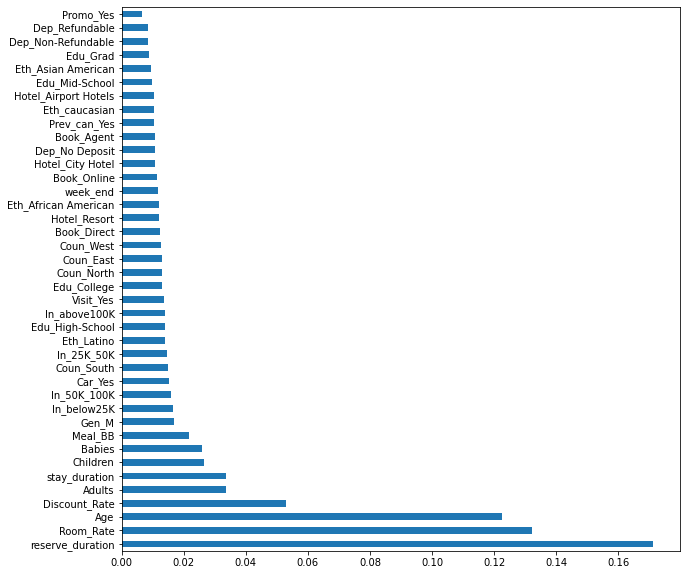

['reserve_duration', 'Room_Rate', 'Age', 'Discount_Rate', 'Adults', 'stay_duration', 'Children', 'Babies', 'Meal_BB', 'Gen_M', 'In_below25K', 'In_50K_100K', 'Car_Yes', 'Coun_South', 'In_25K_50K', 'Eth_Latino', 'Edu_High-School', 'In_above100K', 'Visit_Yes', 'Edu_College']


In [39]:
#Feature Importance in Decision Tree Classifier
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]

print(results['columns'][:20].tolist())

In [40]:
['Age','Adults','Discount_Rate','Room_Rate','week_end','stay_duration','reserve_duration','Eth_African American','Eth_caucasian','Coun_East','Hotel_Airport Hotels','Meal_BB','Meal_FB','Visit_Yes','Prev_can_Yes','Dep_No Deposit']

['Age',
 'Adults',
 'Discount_Rate',
 'Room_Rate',
 'week_end',
 'stay_duration',
 'reserve_duration',
 'Eth_African American',
 'Eth_caucasian',
 'Coun_East',
 'Hotel_Airport Hotels',
 'Meal_BB',
 'Meal_FB',
 'Visit_Yes',
 'Prev_can_Yes',
 'Dep_No Deposit']

##XGB Boost Approach

In [46]:
clf = DecisionTreeClassifier(max_depth=50, class_weight = 'balanced')
#model=xgboost.XGBClassifier(base_estimator=clf,max_depth=20,n_estimators=15,objective='multi:softmax',gamma=4.63,learning_rate=0.2,reg_lambda=1).fit(train_data,train_label) # day 2 second submission model
model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 22, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = 0.05, reg_lambda = 3.4).fit(train_data,train_label)    #hypertuned model
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.9464733349717376
Validation accuracy : 0.46562386322299015
Precision : 0.37028835806578025
Recall : 0.3710159712149064
F1-Score : 0.3694423198719916
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.59      0.61      1610
           1       0.31      0.37      0.34       741
           2       0.17      0.16      0.17       398

    accuracy                           0.47      2749
   macro avg       0.37      0.37      0.37      2749
weighted avg       0.48      0.47      0.47      2749

Confusion Matrix
[[944 477 189]
 [359 273 109]
 [203 132  63]]


Confusion matrix, without normalization
[[944 477 189]
 [359 273 109]
 [203 132  63]]
Normalized confusion matrix
[[0.5863354  0.29627329 0.1173913 ]
 [0.48448043 0.36842105 0.14709852]
 [0.51005025 0.33165829 0.15829146]]


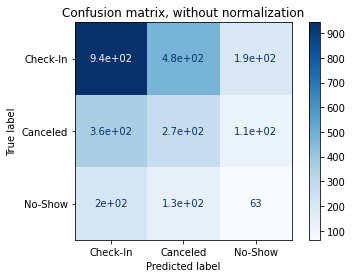

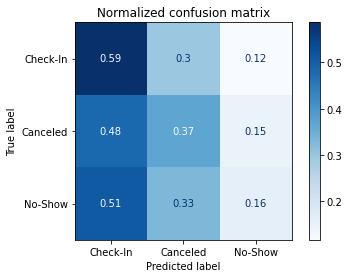

In [47]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


Feature Importance
[0.0103428  0.01034713 0.01041545 0.00950736 0.00996981 0.01031661
 0.0103957  0.01029911 0.01352877 0.01126038 0.01022275 0.00938789
 0.00994589 0.00998728 0.00980251 0.01045095 0.01053091 0.01020225
 0.01013851 0.01031296 0.01080233 0.01051014 0.01032113 0.01004161
 0.0099514  0.01050491 0.01126172 0.01019801 0.01042165 0.5326084
 0.07323558 0.         0.01092107 0.00998498 0.01005696 0.01024993
 0.01009075 0.0098607  0.01080477 0.01094862 0.00986021 0.        ]


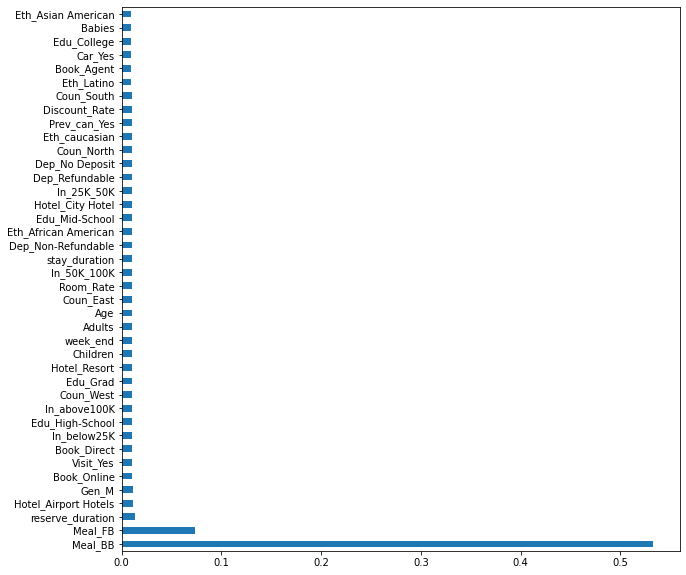

['Meal_BB', 'Meal_FB', 'reserve_duration', 'Hotel_Airport Hotels', 'Gen_M', 'Book_Online', 'Visit_Yes', 'Book_Direct', 'In_below25K', 'Edu_High-School', 'In_above100K', 'Coun_West', 'Edu_Grad', 'Hotel_Resort', 'Children', 'week_end', 'Adults', 'Age', 'Coun_East', 'Room_Rate']


In [48]:
#Feature Importance in XGBoost
print("Feature Importance")
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
plt.figure(figsize=[10,10])
feat_importances = pd.Series(model.feature_importances_, index=train_data.columns)
feat_importances.nlargest(40).plot(kind='barh')

plt.show()
#print(feat_importances)
results=pd.DataFrame()
results['columns']=train_data.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances',ascending=False,inplace=True)

results[:20]
selected_features = results['columns'][:20].tolist()
print(selected_features)

##Support Vector Machine Approach

In [ ]:

model = svm.SVC(degree=9,decision_function_shape='ovo', class_weight = 'balanced')
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

##MLP classifier approach

In [49]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='adam',learning_rate = 'adaptive',learning_rate_init=0.01,activation= 'relu', alpha=1e-6, hidden_layer_sizes=(150, ), random_state=91,max_iter=400)
model.fit(train_data,train_label) 
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.42326533955926926
Validation accuracy : 0.39468897781011275
Precision : 0.39295560861461
Recall : 0.3488040195950457
F1-Score : 0.28976634078804725
Classification Report
              precision    recall  f1-score   support

           0       0.61      0.36      0.45      1610
           1       0.28      0.68      0.40       741
           2       0.29      0.01      0.02       398

    accuracy                           0.39      2749
   macro avg       0.39      0.35      0.29      2749
weighted avg       0.48      0.39      0.38      2749

Confusion Matrix
[[ 580 1025    5]
 [ 235  501    5]
 [ 131  263    4]]


##Random Forest approach

In [62]:
model = RandomForestClassifier(max_depth=12,n_estimators=75, class_weight = 'balanced' )
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.875268288686819
Validation accuracy : 0.41942524554383415
Precision : 0.3410835373015364
Recall : 0.3431283485375456
F1-Score : 0.3378568757691558
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.50      0.54      1610
           1       0.29      0.40      0.34       741
           2       0.14      0.13      0.13       398

    accuracy                           0.42      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.42      0.43      2749

Confusion Matrix
[[806 572 232]
 [346 295 100]
 [197 149  52]]


##KNN approach

In [52]:
model=KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance')
model.fit(train_data,train_label)       
y_predict=model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 1.0
Validation accuracy : 0.4267006184066933
Precision : 0.3273587667102878
Recall : 0.32744913184065466
F1-Score : 0.32738682807150177
Classification Report
              precision    recall  f1-score   support

           0       0.57      0.57      0.57      1610
           1       0.26      0.26      0.26       741
           2       0.15      0.15      0.15       398

    accuracy                           0.43      2749
   macro avg       0.33      0.33      0.33      2749
weighted avg       0.43      0.43      0.43      2749

Confusion Matrix
[[922 442 246]
 [447 190 104]
 [238  99  61]]


Confusion matrix, without normalization
[[922 442 246]
 [447 190 104]
 [238  99  61]]
Normalized confusion matrix
[[0.57267081 0.27453416 0.15279503]
 [0.60323887 0.25641026 0.14035088]
 [0.59798995 0.24874372 0.15326633]]


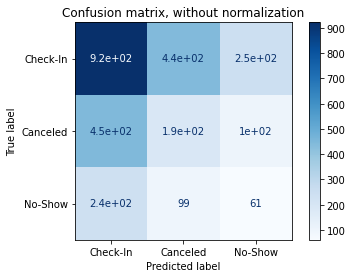

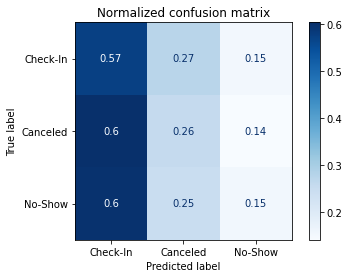

In [53]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
class_names = ["Check-In", "Canceled", "No-Show"]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, val_data, val_label,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

##Ensemble - extra tree classifier approach

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(max_depth=12,n_estimators=100, class_weight = 'balanced')
model.fit(train_data, train_label)
y_predict= model.predict(val_data)
print("Train accuracy : "+str(model.score(train_data,train_label)))
print("Validation accuracy : "+str(model.score(val_data,val_label)))
print("Precision : "+str(precision_score(val_label,y_predict,average='macro', zero_division=0)))
print("Recall : "+str(recall_score(val_label,y_predict,average='macro', zero_division=0)))
print("F1-Score : "+str(f1_score(val_label,y_predict,average='macro', zero_division=0)))
print("Classification Report")
print(classification_report(val_label,y_predict,zero_division=0))
print("Confusion Matrix")
print(confusion_matrix(val_label,y_predict))
#fig, ax = plt.subplots()
#plot_confusion_matrix(val_label, y_predict, ax=ax)


#neptune.log_metric('Training Accuracy', model.score(train_data,train_label))
#neptune.log_metric('Validation Accuracy', model.score(val_data,val_label))
#neptune.log_metric('Precision',precision_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('Recall', recall_score(val_label,y_predict,average='macro', zero_division=0))
#neptune.log_metric('F1-Score',f1_score(val_label,y_predict,average='macro', zero_division=0))

Train accuracy : 0.8822806586384861
Validation accuracy : 0.4514368861404147
Precision : 0.33676821995966916
Recall : 0.3395076221278169
F1-Score : 0.33724075488781374
Classification Report
              precision    recall  f1-score   support

           0       0.60      0.60      0.60      1610
           1       0.29      0.33      0.31       741
           2       0.12      0.09      0.10       398

    accuracy                           0.45      2749
   macro avg       0.34      0.34      0.34      2749
weighted avg       0.45      0.45      0.45      2749

Confusion Matrix
[[960 466 184]
 [402 244  95]
 [228 133  37]]


##Hypertuning the model

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9
1.0
1.1
1.2000000000000002
improvement
1.3000000000000003
improvement
1.4000000000000001
1.5000000000000002
improvement
1.6
1.7000000000000002
1.8000000000000003
1.9000000000000001
2.0
2.1
improvement
2.2
2.3000000000000003
2.4000000000000004
2.5000000000000004
2.6
2.7
2.8000000000000003
2.9000000000000004
3.0000000000000004
3.1
3.2
3.3000000000000003
3.4000000000000004
improvement
3.5000000000000004
3.6
3.7
3.8000000000000003
3.9000000000000004
4.0
4.1
4.2
4.3
4.3999999999999995
4.5
4.6
4.7
4.8
4.9
improvement
5.0


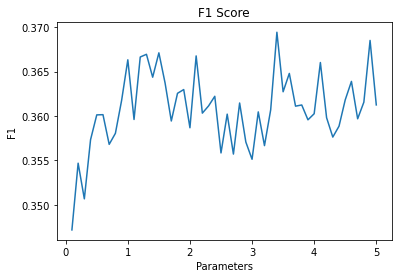

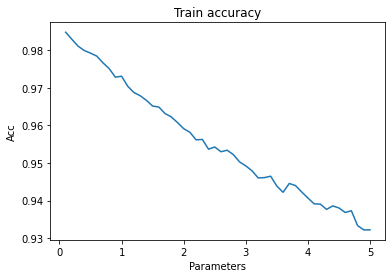

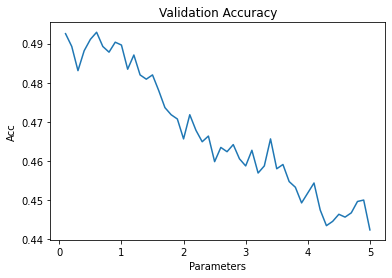

Maximum Training Acc : 0.9847628409928729
0.1
Maximum Validation Acc : 0.4929065114587123
0.6
Maximum F1 Score : 0.3694423198719916
3.4000000000000004


In [ ]:
#Hypertuning Parameters for Accuracy F1score and AUC score
#max_depth
#learning_rate
#min_child_weight 
#gamma 4.63
#colsample_bytree
#scale_pos_weight 
#subsample
#reg_lambda
x=np.linspace(0.1,5,num=50,dtype=float)
train_acc = []
val_acc = []
F = []
clf = DecisionTreeClassifier(max_depth=50, class_weight = 'balanced')
for i in x:
     print(i)
     model=xgboost.XGBClassifier(base_estimator = clf, max_depth = 22, n_estimators = 15, objective = 'multi:softmax', gamma = 4.5, learning_rate = 0.05, reg_lambda = 3.4).fit(train_data,train_label)
     y_pred= model.predict(val_data)
     f=f1_score(val_label,y_pred ,average='macro', zero_division=0)
     F.append(f)
     #auc=roc_auc_score(val_label,y_pred,average='macro')
     #AUC.append(auc)
     train_acc.append(model.score(train_data,train_label))
     val_acc.append(model.score(val_data,val_label))
     if f > 0.3664:
       print("improvement")
 #ploting hypertuning results
 
import matplotlib.pyplot as plt
#plt.plot(x,AUC)
#plt.title('AUC Score')
#plt.ylabel('Auc')
#plt.xlabel('Parameters')
#plt.show()
plt.plot(x,F)
plt.title('F1 Score')
plt.ylabel('F1')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,train_acc)
plt.title('Train accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()
plt.plot(x,val_acc)
plt.title('Validation Accuracy')
plt.ylabel('Acc')
plt.xlabel('Parameters')
plt.show()

print("Maximum Training Acc : "+str(max(train_acc)))
print(x[train_acc.index(max(train_acc))])

print("Maximum Validation Acc : "+str(max(val_acc)))
print(x[val_acc.index(max(val_acc))])

print("Maximum F1 Score : "+str(max(F)))
print(x[F.index(max(F))])




In [ ]:
print(x[F.index(max(F))])

ValueError: ignored

##Neptune log order of Models

In [ ]:
model_list=['logistic regression','Decision Tree Classifier', 'XGB Boost','MLP classifier', 'Random Forest', 'KNN', 'Ensemble - extra tree classifier'  ]
for i in model_list:
  neptune.log_text('Model order',i)
  

In [ ]:
neptune.stop()

#Prediction For submission

In [ ]:
y_predict_2= model.predict(test_data)
y_predict_2


array([2, 0, 0, ..., 1, 0, 1])

In [ ]:
y_predict_2=le.inverse_transform(y_predict_2)
y_predict_2

array([3, 1, 1, ..., 2, 1, 2], dtype=object)

In [ ]:
y_predict_2=pd.DataFrame(y_predict_2,columns=['Reservation_status'] )
y_predict_2

,Reservation_status
0,3
1,1
2,1
3,1
4,1
...,...
4313,2
4314,1
4315,2
4316,1


In [ ]:
test_reservation=pd.DataFrame(test_reservation)
test_reservation

,Reservation-id
0,62931593
1,70586099
2,4230648
3,25192322
4,80931528
...,...
4313,39110574
4314,5496554
4315,59004046
4316,65838682


In [ ]:
test_reservation=pd.concat([test_reservation,y_predict_2],axis=1)
test_reservation

,Reservation-id,Reservation_status
0,62931593,3
1,70586099,1
2,4230648,1
3,25192322,1
4,80931528,1
...,...,...
4313,39110574,2
4314,5496554,1
4315,59004046,2
4316,65838682,1


In [ ]:
#test_reservation.to_csv('submission_XGBoost_upsampled_0.33_0.33_0.33_hypertuned_0.3694.csv',index=False)